In [2]:
import os
import requests
from dotenv import load_dotenv
import zipfile
import io

# Load environment variables
load_dotenv()

KAGGLE_USERNAME = os.getenv("KAGGLE_USERNAME")
KAGGLE_KEY = os.getenv("KAGGLE_KEY")

# Kaggle API endpoint (datasets download)
url = "https://www.kaggle.com/api/v1/datasets/download/nisargpatel344/student-course-completion-prediction-dataset"

# Where to save the extracted files
output_folder = os.getcwd()  # your current project folder
print("Saving files to:", output_folder)

# Perform authenticated request
response = requests.get(
    url,
    auth=(KAGGLE_USERNAME, KAGGLE_KEY),
    stream=True
)

if response.status_code != 200:
    print("Download failed:", response.text)
else:
    print("Download successful! Extracting...")

    # Unzip in memory and extract directly to project folder
    z = zipfile.ZipFile(io.BytesIO(response.content))
    z.extractall(output_folder)

    print("Files extracted:")
    for name in z.namelist():
        print(" -", name)


Saving files to: c:\Users\alimm\OneDrive\Desktop\Projects\Student Course Completion
Download successful! Extracting...
Files extracted:
 - Course_Completion_Prediction.csv


In [3]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("Course_Completion_Prediction.csv")

X = dataset["Age"]
np.percentile(X, 60, method="linear")


np.float64(27.0)

array([[<Axes: title={'center': 'Average_Session_Duration_Min'}>]],
      dtype=object)

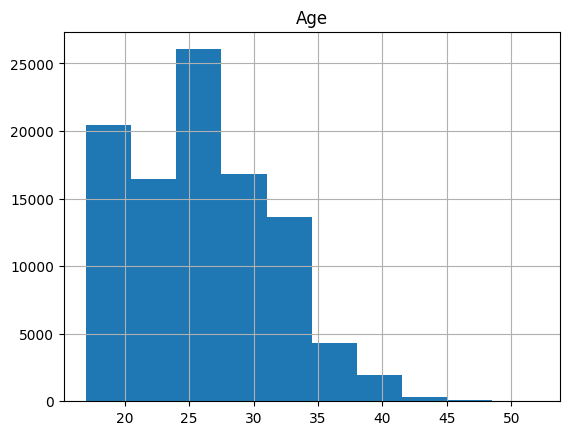

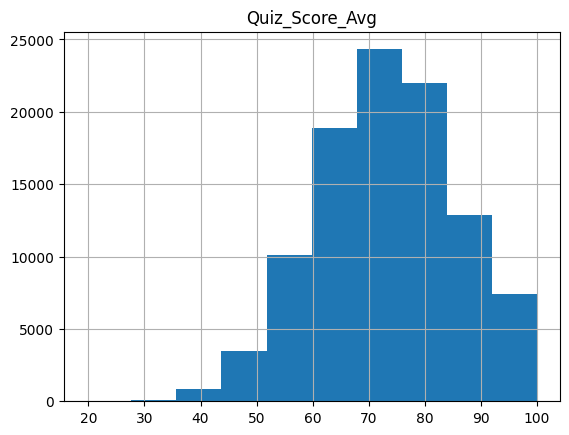

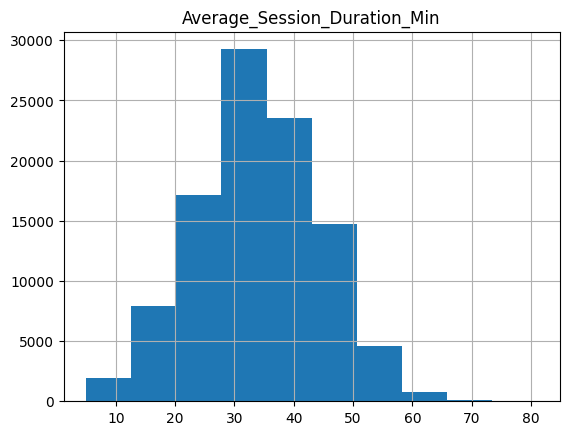

In [8]:
dataset.hist(column="Age", bins=10)
dataset.hist(column="Quiz_Score_Avg", bins=10)
dataset.hist(column="Average_Session_Duration_Min", bins=10)